# Declaration of Originality

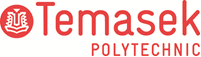

**TEMASEK POLYTECHNIC**
<br>**SCHOOL OF INFORMATICS & IT**
<br>**DIPLOMA IN INFORMATION TECHNOLOGY**
<br>**MACHINE LEARNING FOR DEVELOPERS (CAI2C08)**
<br>**AY2025/2026 OCTOBER SEMESTER**

**PROJECT PROGRAM CODES**
* Student Name (Matric Number)  :   Angel Zafirah   (2402054G)
* Tutorial Group                :   P04
* Tutor						    :  
* Submission Date               : 


**Declaration of Originality**
* I am the originator of this work and I have appropriately acknowledged all other original sources used as my references for this work.
* I understand that Plagiarism is the act of taking and using the whole or any part of another person’s work, including work generated by AI, and presenting it as my own.
* I understand that Plagiarism is an academic offence and if I am found to have committed or abetted the offence of plagiarism in relation to this submitted work, disciplinary action will be enforced.

# Libraries

In [63]:
## Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Business Understanding
Goal: predict the expected amount of sales for chocolate based on product, country, salesperson, shipment volume, and time factors
This helps support sales performance analysis and business decision making

# 2. Data Understanding

## 2.1 Load dataset

In [64]:
## Read *.csv file into pandas DataFrame

df = pd.read_csv("Chocolate Sales (2).csv")
df.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04/01/2022,"$5,320.00",180
1,Van Tuxwell,India,85% Dark Bars,01/08/2022,"$7,896.00",94
2,Gigi Bohling,India,Peanut Butter Cubes,07/07/2022,"$4,501.00",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27/04/2022,"$12,726.00",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24/02/2022,"$13,685.00",184


## 2.2 Summary Statistics

In [65]:
## Understand the type of variable for each column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3282 entries, 0 to 3281
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales Person   3282 non-null   object
 1   Country        3282 non-null   object
 2   Product        3282 non-null   object
 3   Date           3282 non-null   object
 4   Amount         3282 non-null   object
 5   Boxes Shipped  3282 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 154.0+ KB


In [66]:
## Check for missing data

df.isnull().sum()

Sales Person     0
Country          0
Product          0
Date             0
Amount           0
Boxes Shipped    0
dtype: int64

In [67]:
## Describe data distribution

df.describe()


,Boxes Shipped
count,3282.000000
mean,164.666971
std,124.024736
min,1.000000
25%,71.000000
50%,137.000000
75%,232.000000
max,778.000000


# 3 Data Prep

## 3.1 Data cleaning

In [ ]:
## clean Amount
df["Amount"] = (
    df["Amount"]
    .astype(str)
    .str.replace("$", "", regex = False)
    .str.replace(",", "", regex = False)
    .str.strip()
)
df["Amount"] = pd.to_numeric(df["Amount"], errors = "coerce")

## check if it numeric or 
df["Amount"].dtype

dtype('float64')

In [ ]:
## parse the date
df["Date"] = pd.to_datetime(df["Date"], dayfirst = True, errors = "coerce")

## create time features
df["Month"] = df["Date"].dt.month
df["Year"] = df["Date"].dt.year


In [ ]:
## remove dups if any
df = df.drop_duplicates()

In [ ]:
## drop rows that cant be used
df = df.dropna(subset = ["Amount", "Boxes Shipped", "Month", "Year", "Sales Person", "Country", "Product"])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3282 entries, 0 to 3281
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Sales Person   3282 non-null   object        
 1   Country        3282 non-null   object        
 2   Product        3282 non-null   object        
 3   Date           3282 non-null   datetime64[ns]
 4   Amount         3282 non-null   float64       
 5   Boxes Shipped  3282 non-null   int64         
 6   Month          3282 non-null   int32         
 7   Year           3282 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(2), int64(1), object(3)
memory usage: 179.6+ KB


# 4 Data Visualization

### 4.1 distribution of target

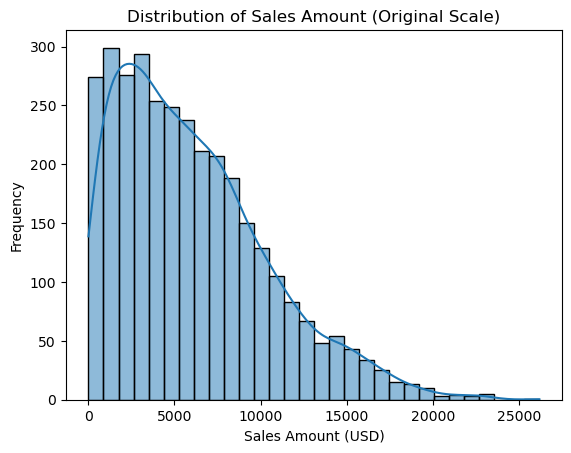

In [82]:
## Understanding distribution of features

sns.histplot(df["Amount"], bins = 30, kde = True)
plt.title("Distribution of Sales Amount (Original Scale)")
plt.xlabel("Sales Amount (USD)")
plt.ylabel("Frequency")
plt.show()

### 4.2 distribution of features

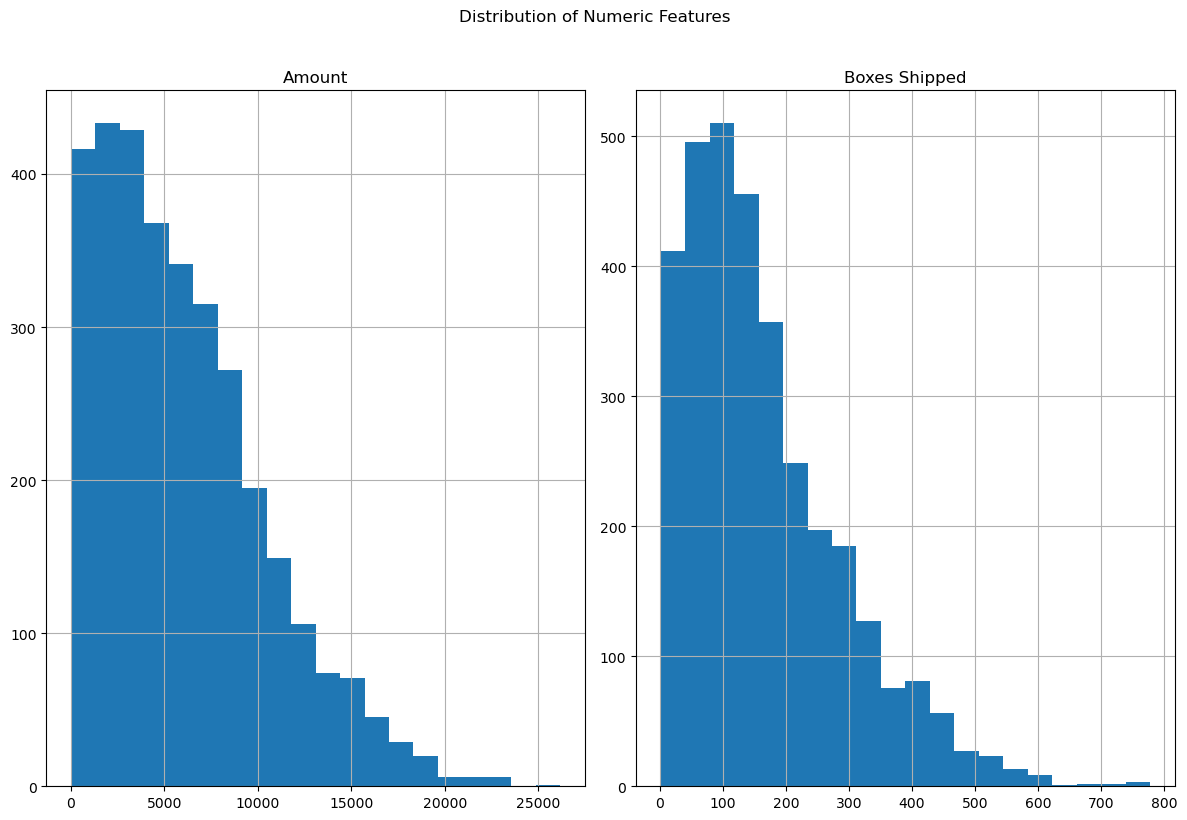

In [83]:
## distrubituion of numeric features
num_cols = df.select_dtypes(include = ["int64", "float64"]).columns

df[num_cols].hist(bins=20, figsize = (12, 8))
plt.suptitle("Distribution of Numeric Features", y = 1.02)
plt.tight_layout()
plt.show()

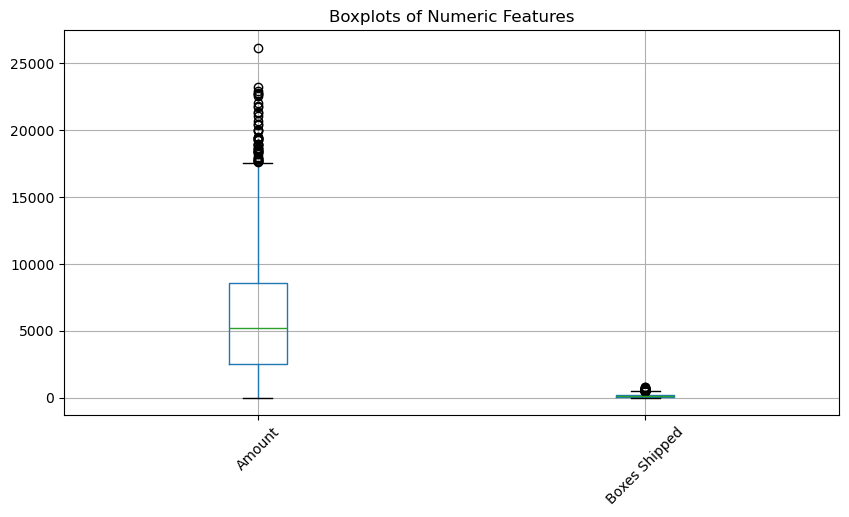

In [84]:
## outliers 
df[num_cols].boxplot(rot = 45, figsize = (10, 5))
plt.title("Boxplots of Numeric Features")
plt.show()

### 4.3 relationships between variables

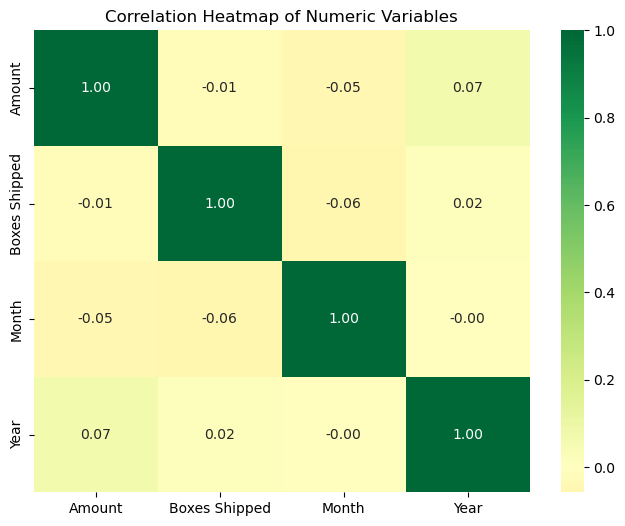

In [85]:
## rls between variables

num_cols = ["Amount", "Boxes Shipped", "Month", "Year"]
corr = df[num_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, cmap = "RdYlGn", center = 0, annot = True, fmt = ".2f")
plt.title("Correlation Heatmap of Numeric Variables")
plt.show()

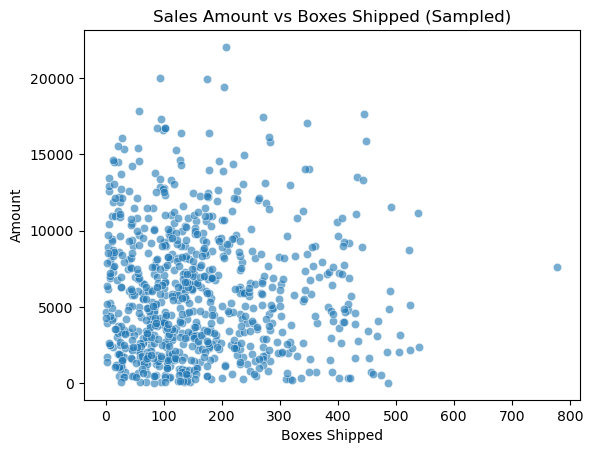

In [86]:
## target vs categorical feature (boxes shipped)

sns.scatterplot(
    data = df.sample(min(800, len(df)), random_state = 42),
    x = "Boxes Shipped",
    y = "Amount", alpha=0.6)
plt.title("Sales Amount vs Boxes Shipped (Sampled)")
plt.show()

#### what the plot shows
the scatter plot of Sales Amount vs Boxes Shipped indicates a positive but non-linear relationship
in general, transactions involving a larger number of boxes tend to result in higher sales amounts. However, the relationship is not perfectly linear and shows significant dispersion

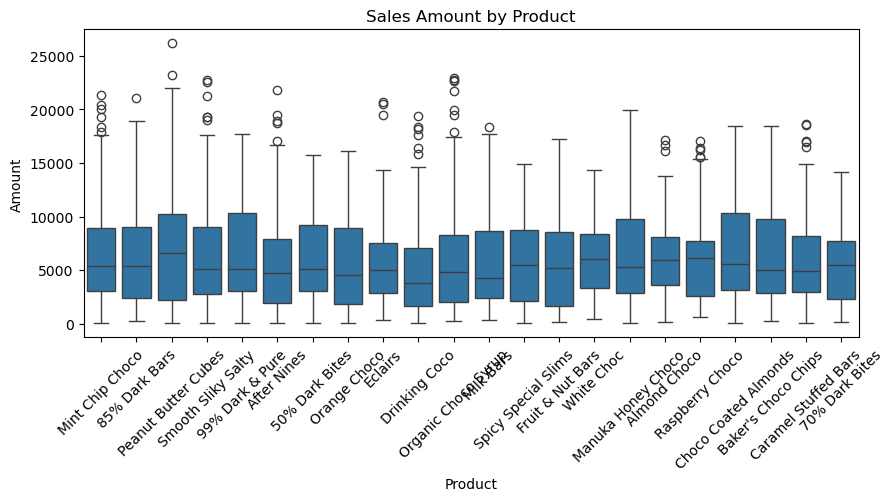

In [87]:
## target vs categorical feature (product)
plt.figure(figsize = (10, 4))
sns.boxplot(data = df, x = "Product", y = "Amount")
plt.xticks(rotation = 45)
plt.title("Sales Amount by Product")
plt.show()

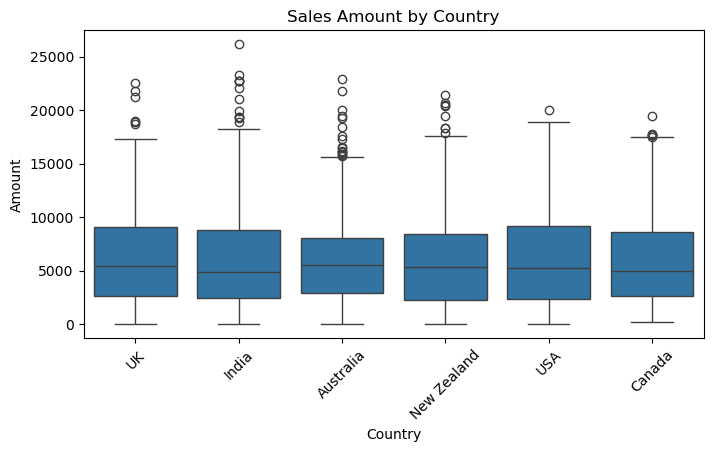

In [88]:
## target vs categorical feature (country)
plt.figure(figsize = (8, 4))
sns.boxplot(data = df, x = "Country", y = "Amount")
plt.xticks(rotation = 45)
plt.title("Sales Amount by Country")
plt.show()

# 5 Modelling

In [91]:
## define x and y

col_y = "Amount"
X = df.drop(columns = [col_y])
y = df[col_y]


### 5.1 Train test split

In [92]:
from sklearn.model_selection import train_test_split

test_size = 0.2
random_state = 42

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = test_size,
    random_state = random_state
)

### 5.2 Preprocess and pipeline

In [93]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

cat_cols = ["Sales Person", "Country", "Product"]
num_cols = ["Boxes Shipped", "Month", "Year"]

preprocessor = ColumnTransformer(
    transformers = [
        ("cat", OneHotEncoder(handle_unknown = "ignore"), cat_cols),
        ("num", "passthrough", num_cols),
    ]
)

rf = RandomForestRegressor(
    n_estimators = 200,
    random_state = 42,
    n_jobs = -1
)

pipeline = Pipeline([
    ("preprocess", preprocessor),
    ("model", rf),
])

pipeline


,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


### 5.3 train baseline

In [94]:
pipeline.fit(X_train, y_train)


,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


# 6 Model evaluation

In [95]:
## evalutate baseline

from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score

y_pred = pipeline.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Baseline MAE:", mae)
print("Baseline RMSE:", rmse)
print("Baseline R2:", r2)


Baseline MAE: 1867.5741510654493
Baseline RMSE: 2412.0027000675273
Baseline R2: 0.6542843719325653


# 7 Hyperparameter

### 7.1 RandomizedSearchCV

In [96]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    "model__n_estimators": [200, 400, 600],
    "model__max_depth": [None, 10, 20],
    "model__min_samples_split": [2, 5, 10],
}

rs = RandomizedSearchCV(
    estimator = pipeline,
    param_distributions = param_dist,
    n_iter = 10,
    cv = 5,
    scoring = "neg_mean_absolute_error",
    random_state = 42,
    n_jobs = -1
)

rs.fit(X_train, y_train)

print("Best Parameters:", rs.best_params_)
print("Best CV Score (neg MAE):", rs.best_score_)


Best Parameters: {'model__n_estimators': 200, 'model__min_samples_split': 2, 'model__max_depth': None}
Best CV Score (neg MAE): -2255.8208833142853


### 7.2 evaluate tuned model

In [97]:
best_model = rs.best_estimator_
y_pred_tuned = best_model.predict(X_test)

mae_tuned = mean_absolute_error(y_test, y_pred_tuned)
rmse_tuned = root_mean_squared_error(y_test, y_pred_tuned)
r2_tuned = r2_score(y_test, y_pred_tuned)

print("Tuned MAE:", mae_tuned)
print("Tuned RMSE:", rmse_tuned)
print("Tuned R2:", r2_tuned)


Tuned MAE: 1867.5741510654493
Tuned RMSE: 2412.0027000675273
Tuned R2: 0.6542843719325653


### 7.3 compare baseline and tuned

In [98]:
comparison = pd.DataFrame([
    {"Model": "Baseline RandomForest", "MAE": mae, "RMSE": rmse, "R2": r2},
    {"Model": "Tuned RandomForest", "MAE": mae_tuned, "RMSE": rmse_tuned, "R2": r2_tuned},
])

comparison

,Model,MAE,RMSE,R2
0,Baseline RandomForest,1867.574151,2412.0027,0.654284
1,Tuned RandomForest,1867.574151,2412.0027,0.654284


# 8 final model for streamlit

### 8.1 choose final model

In [99]:
final_model = best_model


### 8.2 import joblib

In [100]:
import joblib

joblib.dump(final_model, "chocolate_sales_model.pkl")
print("Saved: chocolate_sales_model.pkl")


Saved: chocolate_sales_model.pkl
